# linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weight:
69.13571428571419


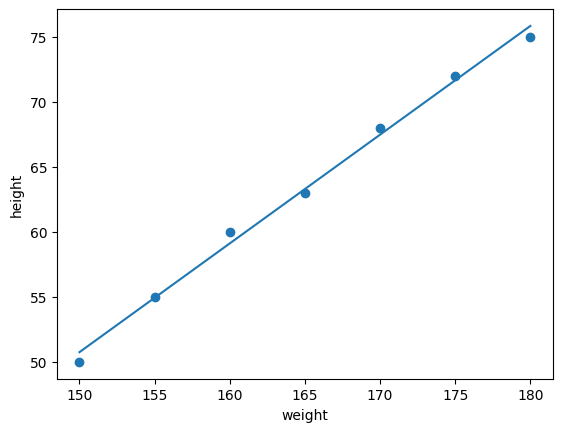

In [3]:

df = {
    "weight": [50,55,60,63,68,72,75],
    "height": [150,155,160,165,170,175,180]
}
df = pd.DataFrame(df)



X = np.array(df['height']).reshape(-1,1)

y = np.array(df['weight'])
# ------------------------

# plot data
# ------------------------
plt.scatter(X,y)
plt.xlabel("weight")
plt.ylabel("height")
# ------------------------
# convert X mxn to X mxn+1
X = np.c_[np.ones((len(X),1)),X]


# ------------------------
# perform OLS
w = np.linalg.inv(X.T@X)@X.T@y
y_p = X@w
# ------------------------



plt.plot(df.iloc[:,1],y_p)

## height: 172, weight =?

print("weight:")
print(np.array([1,172])@w)


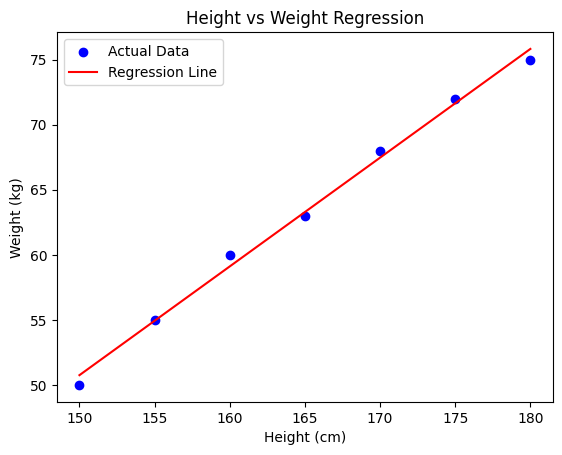

Prediction for height 172: 69.1357
Coefficient (slope): 0.8357
Intercept: -74.6071


In [5]:
from sklearn.linear_model import LinearRegression
# 1. Setup Data
df = {
    "weight": [50, 55, 60, 63, 68, 72, 75],
    "height": [150, 155, 160, 165, 170, 175, 180]
}
df = pd.DataFrame(df)

# X must be 2D for sklearn (rows, features)
X = np.array(df['height']).reshape(-1, 1) 
y = np.array(df['weight'])

# 2. Initialize and Fit the Model
# fit_intercept=True is the default, so it calculates the bias (the 'ones' column) automatically
model = LinearRegression()
model.fit(X, y)

# 3. Make Predictions
# Predict for all X to plot the line
y_pred_line = model.predict(X)

# Predict for specific height: 172
prediction_input = np.array([[172]])
predicted_weight = model.predict(prediction_input)

# 4. Plotting
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_line, color='red', label='Regression Line')

# Correcting labels based on data assignment (X is height, y is weight)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.title("Height vs Weight Regression")
plt.show()

# 5. Output Results
print(f"Prediction for height 172: {predicted_weight[0]:.4f}")
print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Decision Trees

Accuracy:  0.7758
Precision: 0.8679


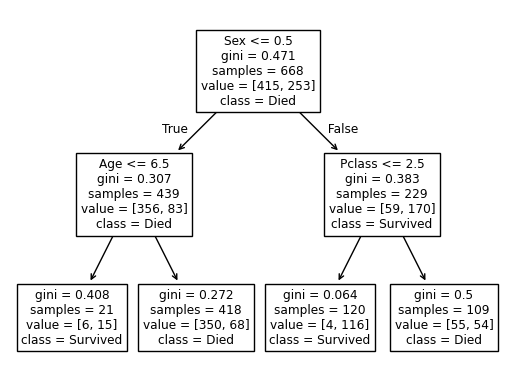

In [11]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


df['Sex'] = df['Sex'].map({'male':0,'female':1})
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)



X = df[['Pclass','Sex','Age','Fare']] # features
y = df['Survived'] # output


# ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ---
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
tree.fit(X_train, y_train)
# ---
from sklearn.tree import plot_tree
plot_tree(tree,feature_names=['Pclass','Sex','Age','Fare'], class_names=['Died', 'Survived'],) # Optional: for better class labels)


from sklearn.metrics import accuracy_score,precision_score
# now train a model to predict the data, to test accuracy
y_p = tree.predict(X_test)

accuracy = accuracy_score(y_test,y_p)

precision = precision_score(y_test, y_p, pos_label=1, zero_division=0)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")

# kmeans

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 

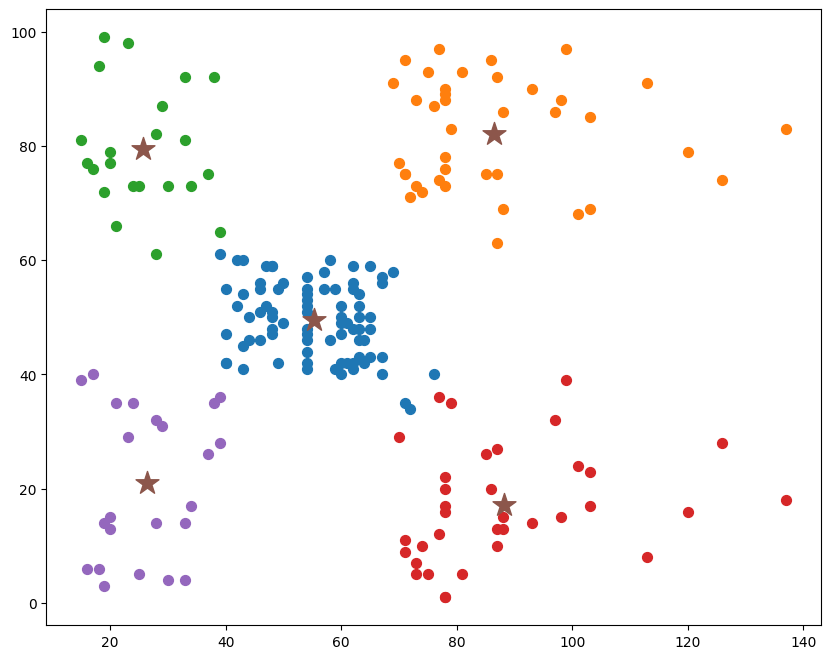

In [8]:
df =pd.read_csv("https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/refs/heads/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv")

print(df)
X = df.iloc[:,[3,4]].values
print(X)
from sklearn.cluster import KMeans

# # --- 1. Simulate the Mall Customer Data ---
# # Simulating data that is known to form 5 distinct clusters (Mall Customer dataset structure)
# np.random.seed(42)
# n_samples = 200

# # Cluster 1: High Income, Low Spending (Low Value)
# inc_1 = np.random.uniform(70, 140, 40)
# spn_1 = np.random.uniform(10, 40, 40)

# # Cluster 2: Medium Income, Medium Spending (Average)
# inc_2 = np.random.uniform(40, 80, 80)
# spn_2 = np.random.uniform(40, 60, 80)

# # Cluster 3: Low Income, High Spending (Careful Spenders)
# inc_3 = np.random.uniform(10, 40, 25)
# spn_3 = np.random.uniform(70, 99, 25)

# # Cluster 4: Low Income, Low Spending (Targetable)
# inc_4 = np.random.uniform(10, 40, 25)
# spn_4 = np.random.uniform(10, 40, 25)

# # Cluster 5: High Income, High Spending (Premium)
# inc_5 = np.random.uniform(70, 140, 30)
# spn_5 = np.random.uniform(70, 99, 30)

# # Combine all data
# income = np.concatenate([inc_1, inc_2, inc_3, inc_4, inc_5])
# spending = np.concatenate([spn_1, spn_2, spn_3, spn_4, spn_5])

# # Create the Feature Matrix X
# X = np.column_stack((income, spending))


# 2. Train the K-Means model with K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# 3. Visualize the clusters and centers
plt.figure(figsize=(10, 8))

# Scatter plot for each cluster
for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                s=50, label=f'Cluster {i+1}')

# Plot the cluster centers (Centroids)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, label='Centroids', marker='*')

# multi-LR

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# --- 1. Data Simulation (Mimicking House Prices Dataset) ---
np.random.seed(42)
n_samples = 1460 

# Features:
# OverallQual (Rating: 1-10)
OverallQual = np.random.randint(4, 10, n_samples) 
# GrLivArea (Sq. Ft: typical range 1000-3000)
GrLivArea = np.random.normal(1500, 400, n_samples).astype(int)
# GarageCars (Number of cars: 1-4)
GarageCars = np.random.randint(1, 5, n_samples) 
# YearBuilt (Year: typical range 1900-2010)
YearBuilt = np.random.randint(1950, 2010, n_samples) 

# Target: SalePrice (Simulated with inherent dependencies + noise)
# Model: Price = 10000 + 15000*Qual + 60*Area + 20000*Cars + 500*Year + noise
SalePrice = (
    10000 + 15000 * OverallQual + 60 * GrLivArea + 
    20000 * GarageCars + 500 * (YearBuilt - 1950) + 
    np.random.normal(0, 30000, n_samples)
).astype(int)

# Combine into a DataFrame
df = pd.DataFrame({
    'OverallQual': OverallQual,
    'GrLivArea': GrLivArea,
    'GarageCars': GarageCars,
    'YearBuilt': YearBuilt,
    'SalePrice': SalePrice
})

# --- 2. Define Features (X) and Target (y) ---
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt']]
y = df['SalePrice']
feature_names = X.columns

# --- 3. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- 4. Train Multiple Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- 5. Predict and Evaluate ---
y_pred = model.predict(X_test)

# Calculate Metrics
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Extract Coefficients
coefficients = pd.Series(model.coef_, index=feature_names)
intercept = model.intercept_

print("## 🏡 Multiple Linear Regression Results\n" + "="*45)

print("\n### 💰 Coefficients and Interpretation")
print(f"Intercept (Base Price): ${intercept:,.2f}")
print("\n--- Coefficients ---")
print(coefficients.map('${:,.2f}'.format))

print("\n### 📈 Model Evaluation Metrics")
print(f"R-squared ($\\mathbb{{R}}^2$): {r_squared:.4f}")
print(f"RMSE: ${rmse:,.2f}")

print("\n### 👑 Feature Impact Analysis")
# Use the absolute value of the standardized coefficients (or scaled data) 
# for true impact, but for general intuition, we'll use the relative magnitude 
# of the unstandardized coefficients as a proxy.
# We will identify the largest coefficient (excluding the intercept)
max_impact_feature = coefficients.abs().idxmax()
print(f"The feature with the largest coefficient magnitude is: **{max_impact_feature}**.")

## 🏡 Multiple Linear Regression Results

### 💰 Coefficients and Interpretation
Intercept (Base Price): $-948,849.29

--- Coefficients ---
OverallQual    $15,149.05
GrLivArea          $60.26
GarageCars     $19,067.42
YearBuilt         $492.33
dtype: object

### 📈 Model Evaluation Metrics
R-squared ($\mathbb{R}^2$): 0.6460
RMSE: $30,610.19

### 👑 Feature Impact Analysis
The feature with the largest coefficient magnitude is: **GarageCars**.


# feature scaling

In [10]:
from sklearn.preprocessing import StandardScaler

# --- 1. Data Simulation ---
np.random.seed(42)
n_samples = 500

# Feature Simulation: Ensure they are factors of price
RAM = np.random.choice([8, 16, 32], n_samples, p=[0.5, 0.35, 0.15]) # 8, 16, 32 GB
Weight = np.random.normal(1.9, 0.4, n_samples) # 1.5 to 3.0 kg
CPU_freq = np.random.normal(2.8, 0.5, n_samples) # 2.0 to 4.0 GHz
Storage = np.random.choice([256, 512, 1024], n_samples, p=[0.4, 0.4, 0.2]) # 256, 512, 1024 GB

# Price Simulation: Price = Intercept + Weights * Features + Noise
# RAM has high weight, Weight has negative weight, CPU and Storage have moderate weights.
Price = (
    100 + 70 * RAM + 
    (-200) * Weight + 
    150 * CPU_freq + 
    0.5 * Storage + 
    np.random.normal(0, 100, n_samples)
)

# Create DataFrame
df = pd.DataFrame({
    'RAM': RAM,
    'Weight': Weight,
    'CPU_frequency': CPU_freq,
    'Storage_size': Storage,
    'Price': Price
})

# --- 2. Define X and y ---
features = ['RAM', 'Weight', 'CPU_frequency', 'Storage_size']
X = df[features]
y = df['Price']

# --- 3. Split Data (Unscaled) ---
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 4. Feature Scaling (StandardScaler) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)

# Convert back to DataFrame for easy viewing (not strictly necessary for training)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

# --- 5. Train and Evaluate Unscaled Model ---
model_unscaled = LinearRegression()
model_unscaled.fit(X_train_unscaled, y_train)
y_pred_unscaled = model_unscaled.predict(X_test_unscaled)

r2_unscaled = r2_score(y_test, y_pred_unscaled)
rmse_unscaled = np.sqrt(mean_squared_error(y_test, y_pred_unscaled))

# --- 6. Train and Evaluate Scaled Model ---
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

r2_scaled = r2_score(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))

# Extract scaled coefficients for importance analysis
scaled_coefficients = pd.Series(model_scaled.coef_, index=features)

# --- 7. Reporting ---
print("## 💻 Laptop Price Prediction Results")
print("="*50)

print("\n### 📈 Performance Comparison (Scaled vs Unscaled)")
print("Note: For Linear Regression, scaling affects coefficient magnitude, not R² or RMSE.")
print("{:<20} {:<10} {:<10}".format("Model", "R-squared", "RMSE"))
print("{:<20} {:<10.4f} {:<10.2f}".format("Unscaled Features", r2_unscaled, rmse_unscaled))
print("{:<20} {:<10.4f} {:<10.2f}".format("Scaled Features", r2_scaled, rmse_scaled))

print("\n### ⭐ Most Significant Predictor")
print("Coefficients are extracted from the **Scaled Model** as they represent true relative importance.")
print("\n--- Scaled Coefficients (Relative Importance) ---")
print(scaled_coefficients.map('{:.4f}'.format))

most_significant_predictor = scaled_coefficients.abs().idxmax()
print(f"\nMost Significant Predictor (based on absolute scaled coefficient): **{most_significant_predictor}**")

print("\n### 🔬 Unscaled Coefficients (Units of Price per Unit of Feature)")
print(pd.Series(model_unscaled.coef_, index=features).map('{:,.2f}'.format))

## 💻 Laptop Price Prediction Results

### 📈 Performance Comparison (Scaled vs Unscaled)
Note: For Linear Regression, scaling affects coefficient magnitude, not R² or RMSE.
Model                R-squared  RMSE      
Unscaled Features    0.9741     95.53     
Scaled Features      0.9741     95.53     

### ⭐ Most Significant Predictor
Coefficients are extracted from the **Scaled Model** as they represent true relative importance.

--- Scaled Coefficients (Relative Importance) ---
RAM              604.2187
Weight           -75.9541
CPU_frequency     74.3877
Storage_size     144.5359
dtype: object

Most Significant Predictor (based on absolute scaled coefficient): **RAM**

### 🔬 Unscaled Coefficients (Units of Price per Unit of Feature)
RAM                70.26
Weight           -189.57
CPU_frequency     147.22
Storage_size        0.53
dtype: object
